In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## ZOO Dataset

In [2]:
zoo = pd.read_csv(r'C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
#describe
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo.duplicated().sum()

0

In [6]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [7]:
zoo[zoo['type'] == 1]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
19,dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1


## Model Building

In [8]:
x = zoo.drop(columns = ['animal name','type'])

In [9]:
y = zoo['type']

In [10]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pcs = pca.fit_transform(x)

In [12]:
pca.explained_variance_ratio_

array([6.25615480e-01, 1.44969052e-01, 7.25316892e-02, 3.90853591e-02,
       2.52571291e-02, 2.12712117e-02, 1.49124811e-02, 1.36876986e-02,
       1.06283642e-02, 9.59018109e-03, 8.16760981e-03, 5.38981516e-03,
       4.28633321e-03, 2.99551097e-03, 1.10195811e-03, 5.10126551e-04])

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.62561548, 0.77058453, 0.84311622, 0.88220158, 0.90745871,
       0.92872992, 0.9436424 , 0.9573301 , 0.96795847, 0.97754865,
       0.98571626, 0.99110607, 0.9953924 , 0.99838792, 0.99948987,
       1.        ])

Text(0.5, 1.0, 'Scree Plot')

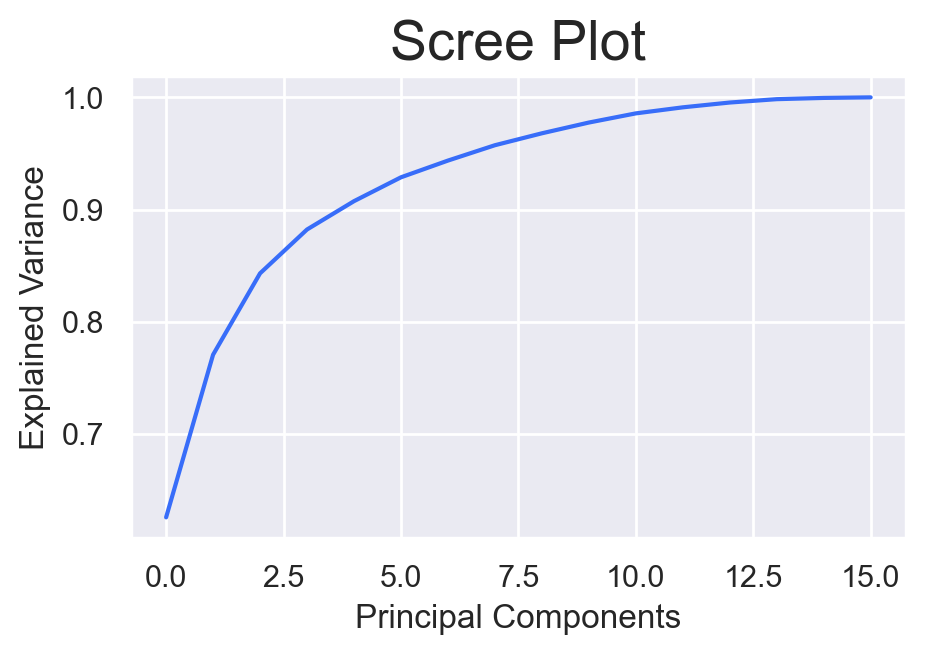

In [14]:
plt.figure(figsize=(5,3),dpi=200)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)

In [15]:
pca = PCA(n_components=8)
pcs = pca.fit_transform(x)
pcs

array([[ 1.35102851e+00, -1.05853312e+00,  3.14102592e-01,
        -4.74432804e-02,  7.22133879e-01, -7.25684382e-02,
         1.93097617e-01, -2.63609397e-03],
       [ 1.30663411e+00, -1.20834446e+00, -2.89405242e-01,
         1.18023825e-01, -2.18509020e-01, -2.85344483e-01,
        -1.89076917e-01, -3.15514036e-01],
       [-3.13165517e+00,  2.52200446e-01,  9.29418707e-01,
         8.17237403e-02, -3.89770531e-01,  2.66292486e-01,
        -8.56332005e-03, -2.16674313e-02],
       [ 1.35102851e+00, -1.05853312e+00,  3.14102592e-01,
        -4.74432804e-02,  7.22133879e-01, -7.25684382e-02,
         1.93097617e-01, -2.63609397e-03],
       [ 1.27729583e+00, -1.22574951e+00,  1.26239109e-01,
        -4.42240813e-01,  2.18646697e-01,  1.25204042e-01,
        -9.69339956e-02, -4.35679868e-02],
       [ 1.30663411e+00, -1.20834446e+00, -2.89405242e-01,
         1.18023825e-01, -2.18509020e-01, -2.85344483e-01,
        -1.89076917e-01, -3.15514036e-01],
       [ 1.32106857e+00, -1.257642

In [16]:
pcs

array([[ 1.35102851e+00, -1.05853312e+00,  3.14102592e-01,
        -4.74432804e-02,  7.22133879e-01, -7.25684382e-02,
         1.93097617e-01, -2.63609397e-03],
       [ 1.30663411e+00, -1.20834446e+00, -2.89405242e-01,
         1.18023825e-01, -2.18509020e-01, -2.85344483e-01,
        -1.89076917e-01, -3.15514036e-01],
       [-3.13165517e+00,  2.52200446e-01,  9.29418707e-01,
         8.17237403e-02, -3.89770531e-01,  2.66292486e-01,
        -8.56332005e-03, -2.16674313e-02],
       [ 1.35102851e+00, -1.05853312e+00,  3.14102592e-01,
        -4.74432804e-02,  7.22133879e-01, -7.25684382e-02,
         1.93097617e-01, -2.63609397e-03],
       [ 1.27729583e+00, -1.22574951e+00,  1.26239109e-01,
        -4.42240813e-01,  2.18646697e-01,  1.25204042e-01,
        -9.69339956e-02, -4.35679868e-02],
       [ 1.30663411e+00, -1.20834446e+00, -2.89405242e-01,
         1.18023825e-01, -2.18509020e-01, -2.85344483e-01,
        -1.89076917e-01, -3.15514036e-01],
       [ 1.32106857e+00, -1.257642

In [17]:
data = pd.DataFrame(pcs, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.351029,-1.058533,0.314103,-0.047443,0.722134,-0.072568,0.193098,-0.002636
1,1.306634,-1.208344,-0.289405,0.118024,-0.218509,-0.285344,-0.189077,-0.315514
2,-3.131655,0.252200,0.929419,0.081724,-0.389771,0.266292,-0.008563,-0.021667
3,1.351029,-1.058533,0.314103,-0.047443,0.722134,-0.072568,0.193098,-0.002636
4,1.277296,-1.225750,0.126239,-0.442241,0.218647,0.125204,-0.096934,-0.043568
...,...,...,...,...,...,...,...,...
96,-0.628988,-1.372461,-0.498469,0.317341,0.127244,-0.311285,-0.151832,-0.310254
97,3.300783,1.217590,-0.223138,0.759334,0.217034,0.017586,0.428811,-0.149260
98,1.277296,-1.225750,0.126239,-0.442241,0.218647,0.125204,-0.096934,-0.043568
99,-2.621602,0.845385,-0.440201,1.199911,1.099461,-0.332652,-0.384510,-0.213624


In [18]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [19]:
x

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-0.86103386, -0.49690399,  0.84372057, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [21]:
xtest

array([[ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
        -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
        -0.29329423, -0.44986771,  0.57253971,  0.58878406, -0.38435306,
        -0.87859537],
       [-0.86103386,  2.01246118,  0.84372057, -0.82663978,  1.79118211,
         1.34370962,  0.89642146, -1.2349089 ,  0.46569032,  0.51234754,
        -0.29329423, -0.44986771, -0.41594766,  0.58878406, -0.38435306,
        -0.87859537],
       [ 1.16139451, -0.49690399, -1.18522652,  1.20971676, -0.55829053,
        -0.74420841, -1.1155467 ,  0.80977633,  0.46569032,  0.51234754,
        -0.29329423, -0.44986771,  0.57253971,  0.58878406, -0.38435306,
         1.13818037],
       [-0.86103386,  2.01246118,  0.84372057, -0.82663978,  1.79118211,
        -0.74420841, -1.1155467 , -1.2349089 ,  0.46569032,  0.51234754,
        -0.29329423, -0.44986771, -0.41594766,  0.58878406, -0.38435306,
        -0.87859537],
       [ 1.16139451, -0.49690399, -1

In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.95, 0.9047619047619048)

## Hyperparameter Tuning

In [23]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [24]:
train_acc

[1.0,
 0.95,
 0.95,
 0.9625,
 0.9625,
 0.95,
 0.925,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.8875,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.8875,
 0.8875]

In [25]:
test_acc

[0.9523809523809523,
 0.8571428571428571,
 0.9047619047619048,
 0.9523809523809523,
 0.8571428571428571,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8095238095238095,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571,
 0.8571428571428571]

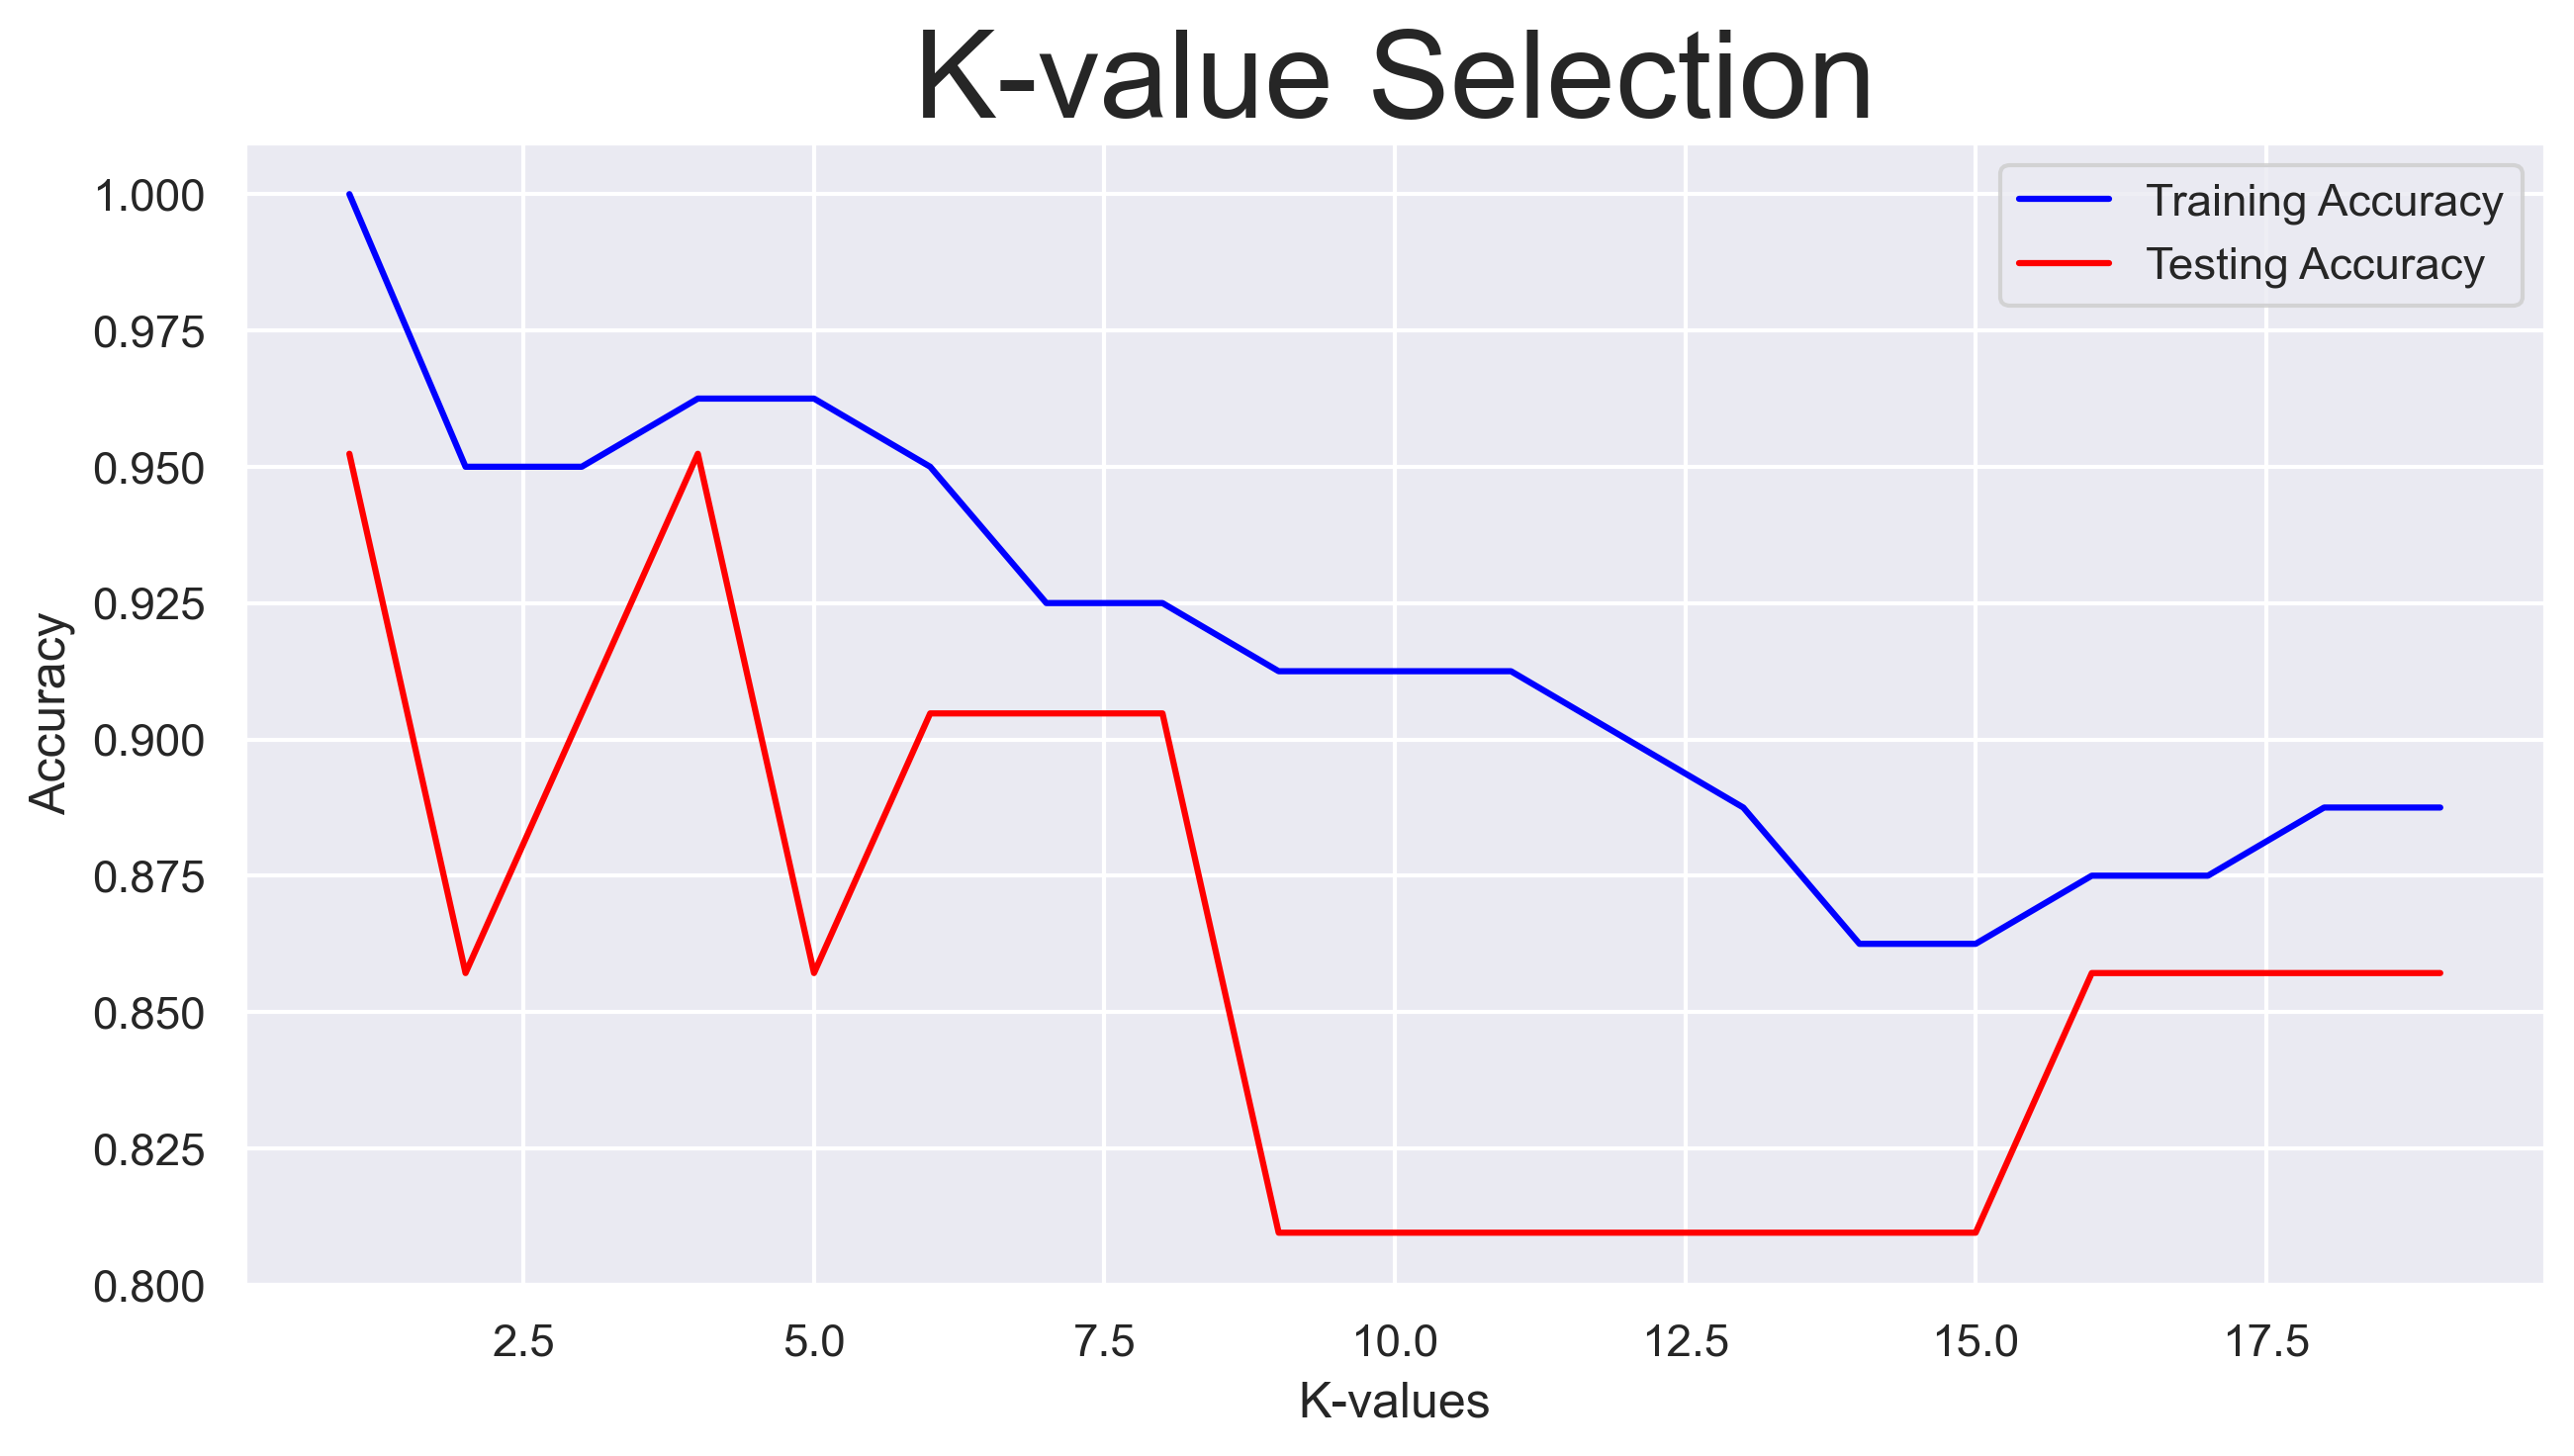

In [26]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend()

In [27]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(f"Train: {knn.score(xtrain,ytrain)}\nTest: {knn.score(xtest,ytest)}")

Train: 0.9625
Test: 0.9523809523809523


In [28]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           7       1.00      0.50      0.67         2

    accuracy                           0.95        21
   macro avg       0.86      0.79      0.81        21
weighted avg       1.00      0.95      0.97        21



### Glass Data

In [29]:
glass = pd.read_csv(r"C:\Users\shree\Desktop\subject\Data_Science\DS_Assignments\Datasets\glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [30]:
glass.shape

(214, 10)

In [31]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [32]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [33]:
glass.duplicated().sum()

1

In [34]:
glass = glass.drop_duplicates()

### Model Building

In [35]:
x = glass.drop(columns = ['Type'])

In [36]:
y = glass['Type']

In [37]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [38]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [39]:
xtest

array([[-0.05543803,  0.3877486 , -1.86017161, -1.79780964,  2.32449882,
        -0.76555411,  1.4311928 , -0.35380764, -0.58830108],
       [-0.69988767,  0.97689136, -1.86017161,  2.70942988,  1.04241296,
        -0.70417146,  0.06039624,  0.45090168,  0.33610316],
       [ 5.14973217, -1.35513207, -1.86017161, -0.90848883, -3.23120658,
        -0.58140614,  5.08665032, -0.35380764,  1.8767769 ],
       [ 1.27972944,  1.25918893, -1.86017161, -0.90848883,  0.01933434,
        -0.61209747,  1.80376828, -0.35380764,  0.23339158],
       [-0.08848673,  0.03180818,  0.13247126, -0.52446394,  0.2394905 ,
         0.07845741,  0.05336651, -0.35380764, -0.58830108],
       [-0.27025458, -1.02373927,  0.54905165, -0.14043905,  0.95176042,
         0.15518573, -0.28406034, -0.35380764,  0.02796841],
       [ 0.23208566,  0.2404629 ,  0.65319675, -0.68615863, -0.01951674,
        -0.55071482, -0.13643609, -0.35380764, -0.58830108],
       [-0.74285098,  0.01953437,  0.50045061, -0.46382843,  0

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.8176470588235294, 0.7441860465116279)

In [41]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

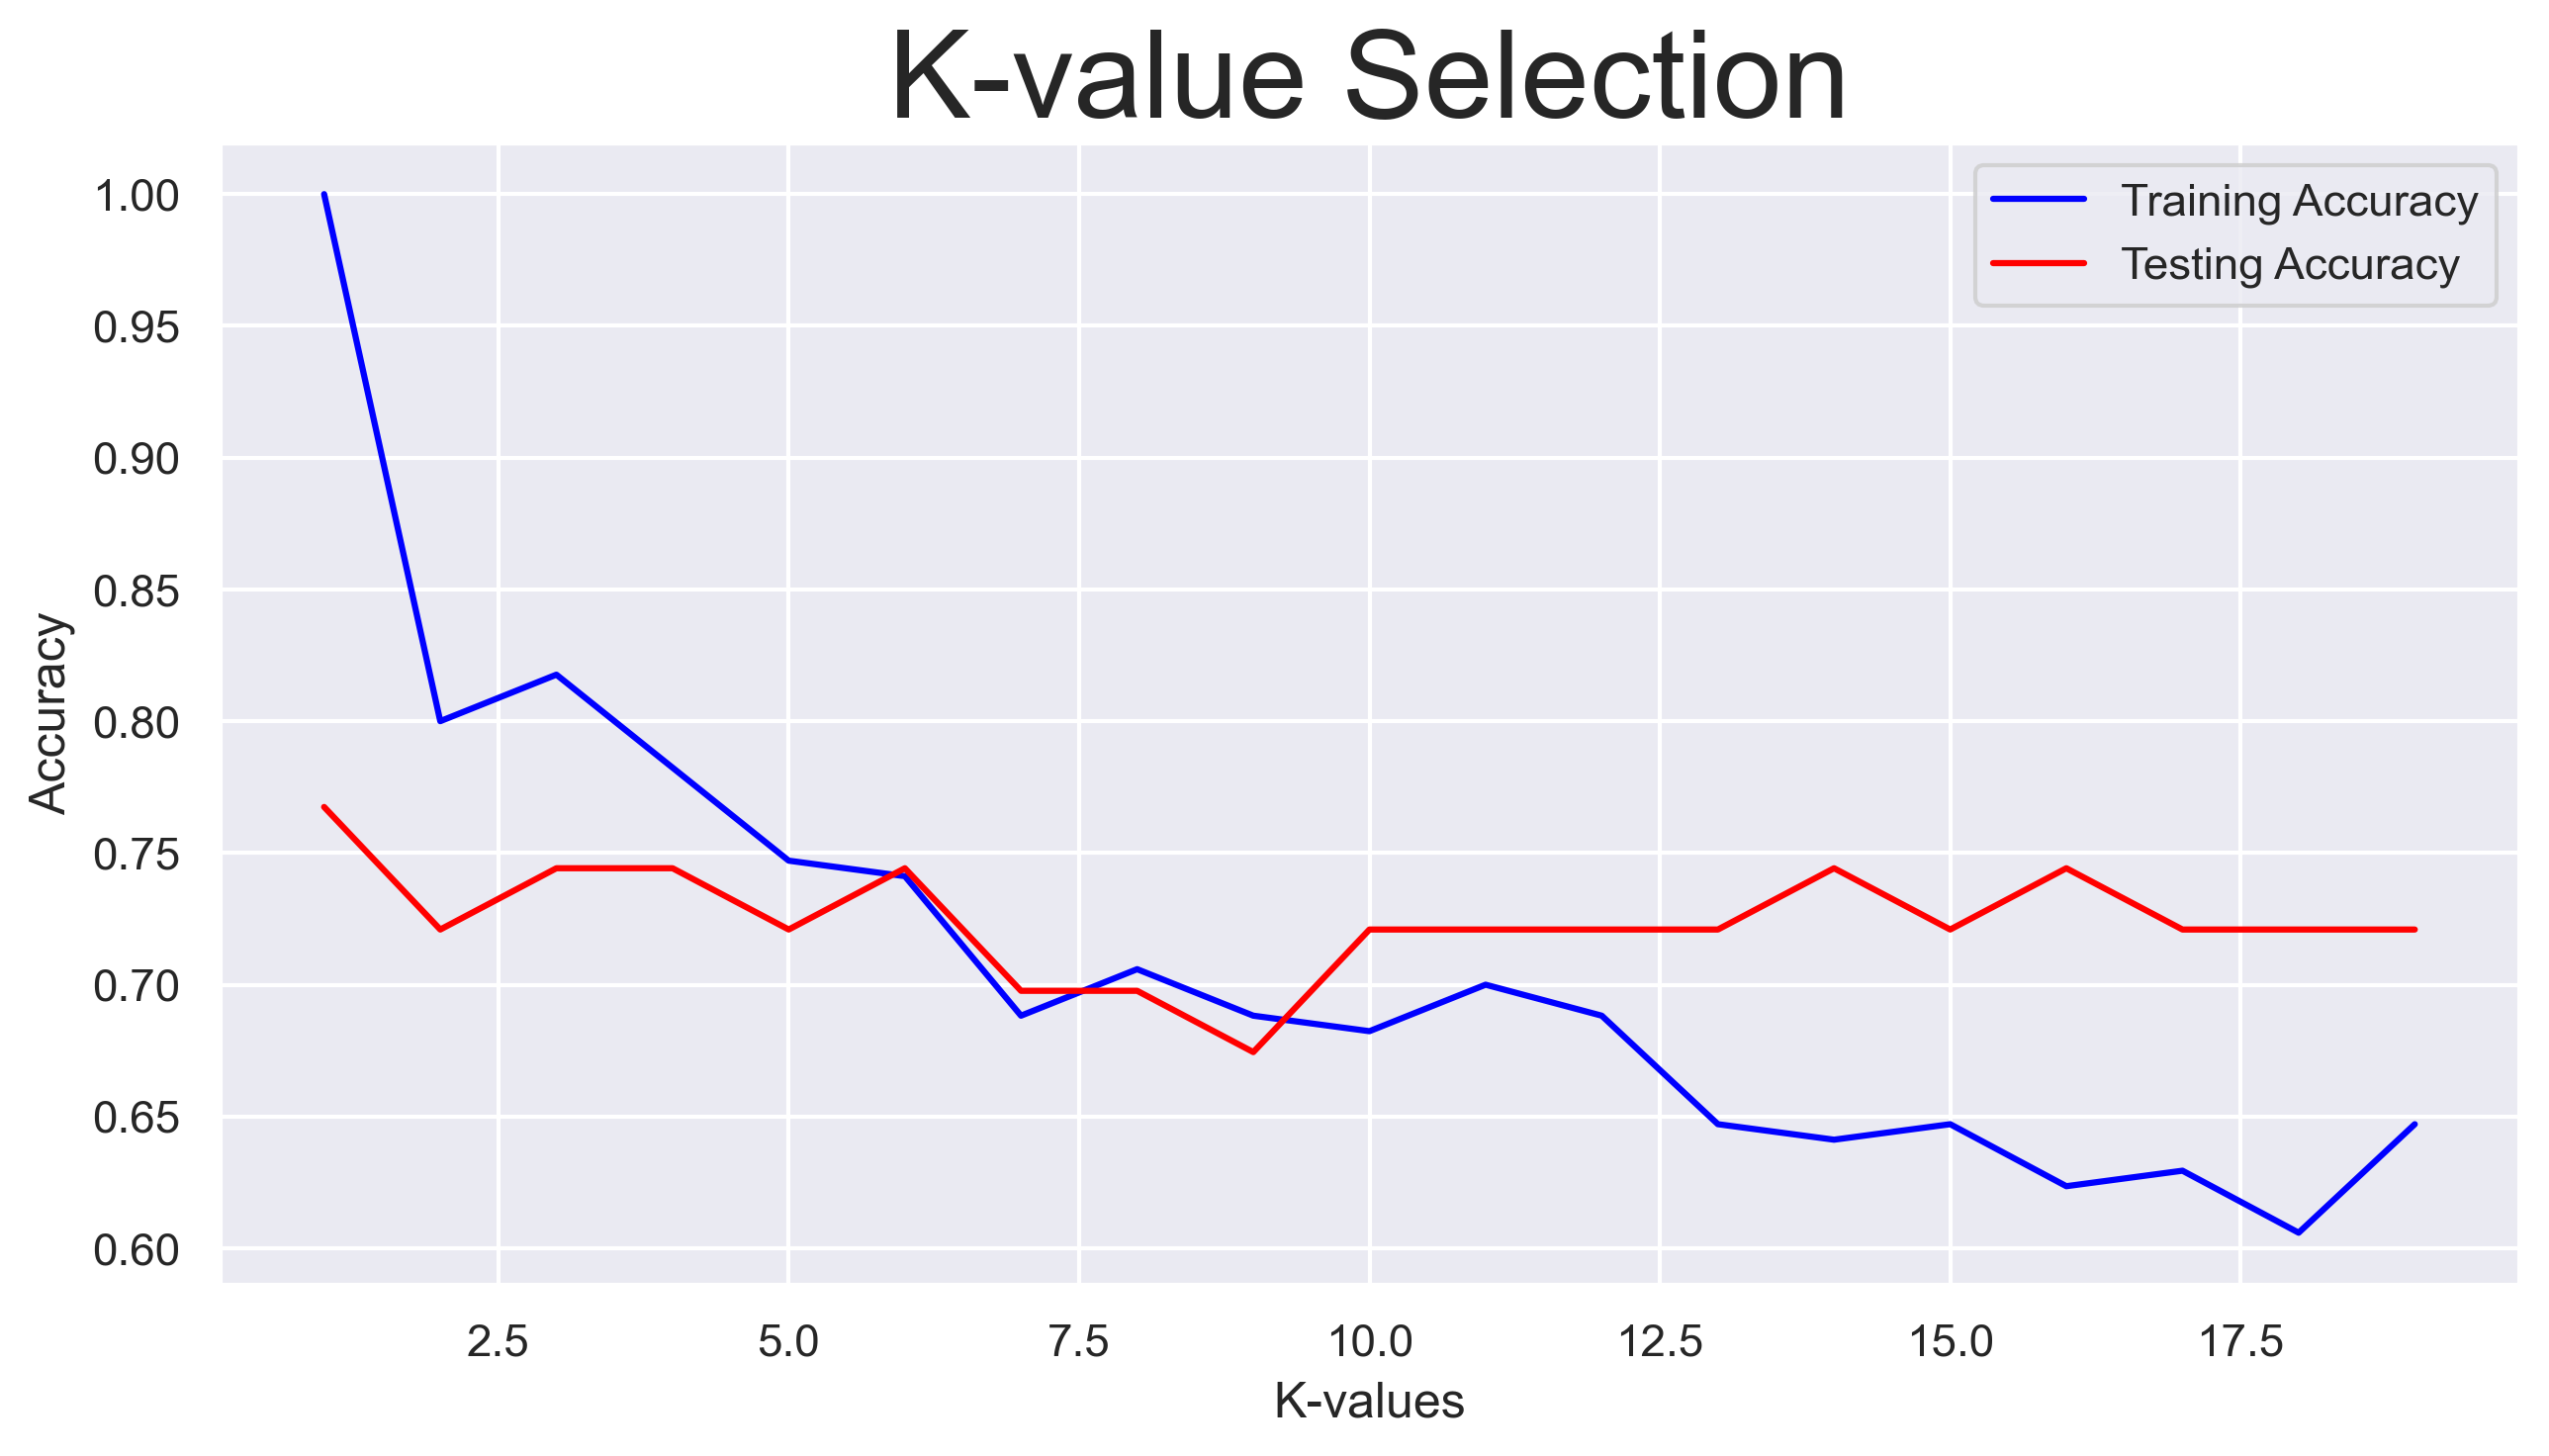

In [42]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection',size = 30)
plt.legend()

In [43]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.7411764705882353, 0.7441860465116279)

In [44]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.79      0.83      0.81        18
           2       0.67      0.77      0.71        13
           3       0.50      0.17      0.25         6
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.74        43
   macro avg       0.74      0.79      0.74        43
weighted avg       0.73      0.74      0.72        43

